# NATURAL LANGUAGE PROCESSING

## Import Library

Berikut ini adalah beberapa library yang dipakai untuk melakukan proses Long Short Term Memory pada Natural Language Processing (NLP).

In [ ]:
!pip install emoji -q
!pip install pandas-stubs -q
!pip install transformers -q
!pip install pad_sequences -q
# Importing required libraries
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 68.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Import Dataset and Data Exploration

Saya melakukan upload 'dataset.csv' secara manual ke collab. Maka dari itu disini saya tidak perlu menghubungkannya ke google drive. Jadi bisa langsung baca dataset dengan code di bawah ini.

In [ ]:
mydata = pd.read_csv('/content/dataset.csv')
mydata.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL


In [ ]:
mydata.tail()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment
45409,d9964102-00a0-49ef-9286-b1c47581b7c5,very useful app,4,0,4.5.1155382,2022-12-20 15:53:24,NaN,NaN,USER_EXPERIENCE,POSITIVE
45410,014ea3e3-4d68-4917-a1f5-95a65c3839b7,try it. see why it rates 1.,1,0,NaN,2022-12-20 14:48:49,NaN,NaN,INTERFACE,NEUTRAL
45411,08fe9675-f425-490c-9bfe-c2e214015c0d,nice and easy very fast updates about news,5,0,4.5.1156292,2022-12-20 14:29:05,NaN,NaN,INTERFACE,POSITIVE
45412,ce773043-cd63-4cf1-af47-2ffc8b564619,this site is awesome .,4,0,4.5.1156292,2022-12-20 14:26:21,NaN,NaN,USER_EXPERIENCE,POSITIVE
45413,42bb2d92-7200-4baf-8efa-df358a7a9264,cool newsletter timeline.,5,0,4.5.1156292,2022-12-20 14:17:55,NaN,NaN,CONTENT,POSITIVE


In [ ]:
mydata.columns

Index(['reviewId', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'at', 'replyContent', 'repliedAt', 'predicted_category', 'sentiment'],
      dtype='object')

Dapat dilihat dari output di atas bahwa terdapat sebanyak 10 variabel pada dataset tersebut.

In [ ]:
print("Number of records: ", mydata.shape[0])
print("Number of fields: ", mydata.shape[1])

Number of records:  45414
Number of fields:  10


Jumlah total pengamatan/observasi yaitu sebesar 45414 data dengan 10 variabel yang ada.

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45414 entries, 0 to 45413
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              45414 non-null  object
 1   content               45414 non-null  object
 2   score                 45414 non-null  int64 
 3   thumbsUpCount         45414 non-null  int64 
 4   reviewCreatedVersion  40367 non-null  object
 5   at                    45414 non-null  object
 6   replyContent          2477 non-null   object
 7   repliedAt             2477 non-null   object
 8   predicted_category    45414 non-null  object
 9   sentiment             45414 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.5+ MB


Code di atas itu berguna untuk melihat banyaknya variabel terus tipe data dari masing - masing variabel.

In [ ]:
mydata.describe()

,score,thumbsUpCount
count,45414.000000,45414.000000
mean,4.372859,1.918571
std,1.204822,12.078805
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,561.000000


Ini kenapa munculnya hanya 2? Hal ini dikarenakan dari 10 variabel yang ada di dataset, hanya variabel score dan thumbsUpCount saja yang memiliki tipe data berupa integer, sehingga kita bisa menghitung nilai tersebut.

## Data Preparation

Dari ke-10 variabel pada dataset. Saya hanya menggunakan variabel "content" dan "sentiment". Nah isi dari variabel "content" ini seperti kalimat - kalimat komentar sedangkan pada "sentiment" di klasifikasikan menjadi 3 yaitu "NEUTRAL" atau "POSITIVE" atau "NEGATIVE"

In [ ]:
mydata = mydata[['content', 'sentiment']]
mydata.isnull().sum()

content      0
sentiment    0
dtype: int64

Dapat dilihat bahwa tidak ada missing value di kedua variabel tersebut.

Setelah itu, saya melakukan proses sampling yang hanya mengambil sebanyak 5000 data. Hal ini dikarenakan jumlah pengamatan yang mencapai angka 45414 yang dimana angka ini tergolong besar

In [ ]:
mydata = mydata.sample(5000)

In [ ]:
print("Number of records: ", mydata.shape[0])
print("Number of fields: ", mydata.shape[1])

Number of records:  5000
Number of fields:  2


Nah, dapat dilihat bahwa data yang akan saya pakai untuk proses LSTM pada Natural Language Processing sebanyak 5000 data dengan 2 variabel yaitu "content" dan "sentiment".

### Data Cleaning

Proses membersihkan data. Ini termasuk dalam menghapus karakter khusus, angka, simbol yang tidak perlu dan menghentikan kata - kata. Juga diperlukan untuk mengubah kata - kata ke bentuk akarnya agar mudah ditafsirkan.

In [ ]:
def remove_html(x):
    html=re.compile(r'<.*?>')
    return html.sub(r'',x)

def remove_emoji(x):
    return emoji.replace_emoji(x, '')

In [ ]:
def cleaning(df, stop_words):

    df['content'] = df['content'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

    # Removing stop words
    df['content'] = df['content'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

    # Lemmatization
    df['content'] = df['content'].apply(lambda x: ' '.join([Word(x).lemmatize() for x in x.split()]))

    # Menghapus tag html
    df['content'] = df['content'].apply(lambda x: remove_html(x))

    # Menghapus emoji (jika ada)
    df['content'] = df['content'].apply(lambda x: remove_emoji(x))

    # Menghapus spasi kosong
    df['content'] = df['content'].apply(lambda x: x.strip())

    return df

stop_words = stopwords.words('english')

mydata = cleaning(mydata, stop_words)

### Data Visualization

Kali ini saya akan memvisualisasikan beberapa kata - kata umum dalam variabel "content". Ukuran setiap kata mewakili frekuensi kemunculannya dalam data.

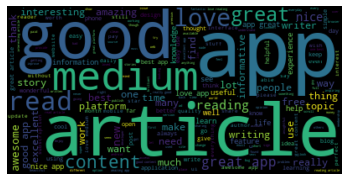

In [ ]:
common_words=''
for i in mydata.content:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan output gambar di atas, diketahui bahwa kata - kata seerti "article, good, app" adalah yang paling sering muncul di dalam variabel "content". Jadi semakin besar kata - katanya maka semakin sering dia muncul.

### Label Encoding

Selanjutnya masuk ke dalam tahapan Label Encoding. Dikarenakan pada variabel "sentiment" terdapat 3 kategori yaitu "NEUTRAL", "POSITIVE" atau "NEGATIVE" maka dilakukan Label encoding yang berguna untuk mengubah setiap nilai dalam kolom menjadi angka yang berurutan

In [ ]:
# Encoded the target column
lb = LabelEncoder()
mydata['sentiment'] = lb.fit_transform(mydata['sentiment'])

In [ ]:
mydata.head()

,content,sentiment
31308,uninstalling. ..used love app i'm going pay mo...,0
28028,good educative application,2
14089,"enjoy reading article find here. creator side,...",2
18930,good sharing point view,2
24336,easy read go.,2


In [ ]:
mydata.tail()

,content,sentiment
25173,really good medium knowledge.,2
26685,best way share personal experience knowledge. ...,2
16549,great app reading stimulating content,2
22974,great way access premium content.,2
16029,good,2


### Tokenizing

Tokenizing berguna untuk memecah kalimat - kalimat tersebut menjadi kata sehingga akan memudahkan proses analisis data.

In [ ]:
tokenizer = Tokenizer(num_words = 500, split = ' ')
tokenizer.fit_on_texts(mydata['content'].values)
X = tokenizer.texts_to_sequences(mydata['content'].values)
X = pad_sequences(X)



*   num_words: Merupakan Hyperparameter yang mengacu pada jumlah kata yang harus dipertahankan berdasarkan frekuensi kata.
*   Split: Hyperparameter ini mengacu pada pemisah yang digunakan dalam memisahkan kata di dalam kalimat.
*   pad_sequence(): Fungsi ini digunakan untuk mengubah daftar urutan menjadi array NumPy 2D





### Model Arsitektur LSTM

Long Short Term Memory (LSTM) merupakan model varian dari RNN. LSTM ini muncul karena dapat mengingat informasi jangka panjang (Long Term dependency). LSTM ini menggantikan simpul hidden layer di RNN dengan sel LSTM yang berfungsi untuk menyimpan informasi sebelumnya. Dalam LSTM ini terdapat tiga gerbang yang mengendalikan penggunaan dan memperbarui informasi teks terdahulu. Tiga gerbang ini yaitu
1. Forget Gate: Gerbang ini bertanggung jawab untuk memutuskan informasi mana yang disimpan untuk menghitung keadaan sel dan mana yang tidak relevan dapat dibuang.

2. Input Gate: Memperbarui status sel dan memutuskan informasi mana yang penting dan mana yang tidak. Karena gerbang lupa membantu membuang informasi, gerbang input membantu menemukan informasi penting dan meyimpan data tertentu dalam memori yang relevan.

3. Output Gate: Semua informasi yang diperoleh digunakan untuk menghitung keadaan sel baru. Status sel pertama dikalikan dengan output dari forget gate. Hal ini memiliki kemungkinan menjatuhkan nilai dalam  status sel jika dikalikan dengan nilai dan mendekati angka 0. Kemudian penambahan yang tepat dengan output dari input gate memperbarui status sel ke nilai baru yang dianggap relevan oleh jaringan saraf.

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 57, 120)           60000     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 57, 120)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 176)               209088    
                                                                 
 dense_1 (Dense)             (None, 3)                 531       
                                                                 
Total params: 269,619
Trainable params: 269,619
Non-trainable params: 0
_________________________________________________________________


Disini saya ingin menjadikan variabel 'content' sebagai X sedangkan variabel 'sentiment' sebagai y. Dikarenakan variabel 'sentiment' sudah diubah ke dalam bentuk angka yaitu 0, 1 atau 2 maka kita bisa memanggilnya dengan code sebagai berikut. Setelah itu dilakukan split data dengan pembagian 30% untuk test size sisa 70% untuk train.

In [ ]:
#Splitting the data into training and testing
y = pd.get_dummies(mydata['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Result

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = 32, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
110/110 [==============================] - 36s 276ms/step - loss: 0.4371 - accuracy: 0.7489 - val_loss: 0.3550 - val_accuracy: 0.7847
Epoch 2/10
110/110 [==============================] - 29s 269ms/step - loss: 0.2744 - accuracy: 0.8234 - val_loss: 0.2493 - val_accuracy: 0.8400
Epoch 3/10
110/110 [==============================] - 33s 297ms/step - loss: 0.2139 - accuracy: 0.8617 - val_loss: 0.2442 - val_accuracy: 0.8433
Epoch 4/10
110/110 [==============================] - 38s 345ms/step - loss: 0.1988 - accuracy: 0.8720 - val_loss: 0.2500 - val_accuracy: 0.8353
Epoch 5/10
110/110 [==============================] - 30s 269ms/step - loss: 0.1842 - accuracy: 0.8846 - val_loss: 0.2604 - val_accuracy: 0.8367
Epoch 6/10
110/110 [==============================] - 28s 256ms/step - loss: 0.1736 - accuracy: 0.8877 - val_loss: 0.2663 - val_accuracy: 0.8380
Epoch 7/10
110/110 [==============================] - 29s 267ms/step - loss: 0.1645 - accuracy: 0.8977 - val_loss: 0.2791 - val_ac

In [ ]:
model.evaluate(X_test,y_test)

47/47 [==============================] - 2s 33ms/step - loss: 0.2940 - accuracy: 0.8373


[0.29402658343315125, 0.8373333215713501]

Model akurasi yang dihasilkan yaitu sebesar 0.83 atau 83%

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5, 1, 0)

47/47 [==============================] - 3s 55ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       157
           1       0.56      0.48      0.52       190
           2       0.91      0.92      0.91      1153

   micro avg       0.84      0.83      0.84      1500
   macro avg       0.70      0.66      0.68      1500
weighted avg       0.83      0.83      0.83      1500
 samples avg       0.83      0.83      0.83      1500



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Output di atas juga memunculkan nilai precision, recall, f1-score serta nilai support untuk masing - masing kategori dari variabel "sentiment".

### Referensi:
https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm/

https://www.kaggle.com/code/arunrk7/nlp-beginner-text-classification-using-lstm

https://rifqifai.com/cara-kerja-long-short-term-memory-lstm/

https://www.analyticsvidhya.com/blog/2021/06/lstm-for-text-classification/#:~:text=it%20be%20used%3F-,What%20is%20LSTM%3F,patterns%20LSTMs%20perform%20fairly%20better.